# 1. Functions, libraries and packages

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [214]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [215]:
df = pd.read_csv(r'..\Data\products.csv')

In [216]:
df.head(5)

,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
0,P0001,Frame_Industrial_Fire-rated_RAL7024_Aluminum (...,Frame,Industrial,Fire-rated,638.0,336.0,RAL7024,Aluminum (AL),Left,Cardbox,56,173.67
1,P0002,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,621.0,1195.0,RAL7024,Steel (ST),Left,Wooden box,4,244.81
2,P0003,Frame_Residential_Exterior_RAL9005_Steel (ST)_...,Frame,Residential,Exterior,699.0,1143.0,RAL9005,Steel (ST),Left,Cardbox,84,121.27
3,P0004,Door_Commercial_Retail_RAL9005_Aluminum (AL)_L...,Door,Commercial,Retail,614.0,1493.0,RAL9005,Aluminum (AL),Left,Cardbox,22,216.81
4,P0005,Frame_Commercial_Warehouse_RAL7024_Aluminum (A...,Frame,Commercial,Warehouse,750.0,1275.0,RAL7024,Aluminum (AL),Left,Cardbox,99,108.44


# 3.EDA

## 3.1 NaN values

In [217]:
dataframe_info(df).sort_values(by = 'Missing Values', ascending = False)

,Column_name,Total records,Missing Values,Data type,Unique values
2,Product_type,300000,329,object,2
6,Height,300000,311,float64,1771
8,Product_handle,300000,307,object,3
3,Product_category,300000,302,object,5
5,Width,300000,300,float64,137
9,Product_hinge,300000,297,object,2
4,Product_subcategory,300000,290,object,15
7,Product_color,300000,288,object,3
10,Product_packing,300000,276,object,2
1,Product_desc,300000,0,object,299825


### 3.1.2 String NaN values

In [218]:
list_object_cols = list(df.select_dtypes('object').columns)
list_object_cols

['Product_ID',
 'Product_desc',
 'Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

In [219]:
df.loc[df.Product_handle.isna(),:]


,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
7,P0008,Door_Design_Glass-panel_RAL9005_Steel (ST)_Lef...,Door,Design,Glass-panel,710.0,1689.0,RAL9005,NaN,Left,Wooden box,53,162.02
1763,P1764,Door_Design_Classic_RAL9005_Plastic (PL)_Left_...,Door,Design,Classic,733.0,1164.0,RAL9005,NaN,Left,Cardbox,50,181.76
2197,P2198,Frame_Industrial_Soundproof_RAL7035_Aluminum (...,Frame,Industrial,Soundproof,675.0,1319.0,RAL7035,NaN,Right,Cardbox,69,155.70
2489,P2490,Frame_Design_Glass-panel_RAL7024_Steel (ST)_Le...,Frame,Design,Glass-panel,749.0,579.0,RAL7024,NaN,Left,Wooden box,82,132.62
4014,P4015,Frame_Security_Access-controlled_RAL9005_Plast...,Frame,Security,Access-controlled,745.0,1608.0,RAL9005,NaN,Right,Cardbox,82,125.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296887,P296888,Frame_Commercial_Warehouse_RAL9005_Plastic (PL...,Frame,Commercial,Warehouse,671.0,1582.0,RAL9005,NaN,Right,Cardbox,35,204.41
299113,P299114,Door_Residential_Interior_RAL9005_Steel (ST)_R...,Door,Residential,Interior,697.0,1648.0,RAL9005,NaN,Right,Wooden box,78,140.75
299486,P299487,Door_Residential_Interior_RAL7024_Plastic (PL)...,Door,Residential,Interior,670.0,344.0,RAL7024,NaN,Left,Wooden box,1,500.00
299698,P299699,Frame_Commercial_Office_RAL9005_Steel (ST)_Rig...,Frame,Commercial,Office,673.0,1719.0,RAL9005,NaN,Right,Cardbox,57,165.90


In [220]:
regex_mapping = {
    'Product_type': r'^([^_]+)',  
    'Product_category': r'^[^_]+_([^_]+)', 
    'Product_subcategory': r'^[^_]+_[^_]+_([^_]+)',  
    'Product_color': r'^[^_]+_[^_]+_[^_]+_([^_]+)',  
    'Product_handle': r'^[^_]+_[^_]+_[^_]+_[^_]+_([^_]+)',  
    'Product_hinge': r'^[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_([^_]+)', 
    'Product_packing': r'^[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_(.+)$'  
}

In [221]:
for col, regex in regex_mapping.items():
    if col in list_object_cols:
        df[col] = df[col].fillna(df['Product_desc'].str.extract(regex)[0])

In [222]:
dataframe_info(df).sort_values(by = 'Missing Values', ascending = False)

,Column_name,Total records,Missing Values,Data type,Unique values
6,Height,300000,311,float64,1771
5,Width,300000,300,float64,137
2,Product_type,300000,0,object,2
1,Product_desc,300000,0,object,299825
0,Product_ID,300000,0,object,300000
4,Product_subcategory,300000,0,object,15
3,Product_category,300000,0,object,5
7,Product_color,300000,0,object,3
8,Product_handle,300000,0,object,3
9,Product_hinge,300000,0,object,2


In [223]:
df.Product_handle.value_counts()

Product_handle
Plastic (PL)     100322
Aluminum (AL)    100026
Steel (ST)        99652
Name: count, dtype: int64

In [224]:
category_col = [
 'Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

for col in category_col:
    df[col] = df[col].astype('category')

### 3.1.2 Numeric NaN values

In [225]:
df.select_dtypes('number').columns

Index(['Width', 'Height', 'Product_batch', 'Product_costs'], dtype='object')

In [226]:
desc_nan_value_coles = ['Width', 'Height']
                        

In [227]:
dimensions_regex_mapping = {
    'Width': r'_(\d+)x\d+_',   # Extrahuje číslo před 'x'
    'Height': r'_\d+x(\d+)_'   # Extrahuje číslo za 'x'
}

In [228]:
for col, regex in dimensions_regex_mapping.items():
    if col in desc_nan_value_coles:
        df[col] = df[col].fillna(df['Product_desc'].str.extract(regex)[0])

In [229]:
cols_to_float = ['Width', 'Height', 'Product_batch', 'Product_costs']

for col in cols_to_float:
    df[col] = df[col].astype('float')

In [230]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Product_ID,300000,0,object,300000
1,Product_desc,300000,0,object,299825
2,Product_type,300000,0,category,2
3,Product_category,300000,0,category,5
4,Product_subcategory,300000,0,category,15
5,Width,300000,0,float64,137
6,Height,300000,0,float64,1771
7,Product_color,300000,0,category,3
8,Product_handle,300000,0,category,3
9,Product_hinge,300000,0,category,2


## 3.2 Basic statistics

In [231]:
df.describe()

,Width,Height,Product_batch,Product_costs
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,682.075287,1005.541970,50.521997,188.368322
std,39.631004,510.629604,28.866934,134.572824
min,614.000000,120.000000,1.000000,90.000000
25%,648.000000,564.000000,26.000000,137.150000
50%,682.000000,1006.000000,50.000000,175.070000
75%,716.000000,1447.000000,76.000000,212.850000
max,750.000000,1890.000000,100.000000,4929.140711


<Axes: xlabel='Product_batch'>

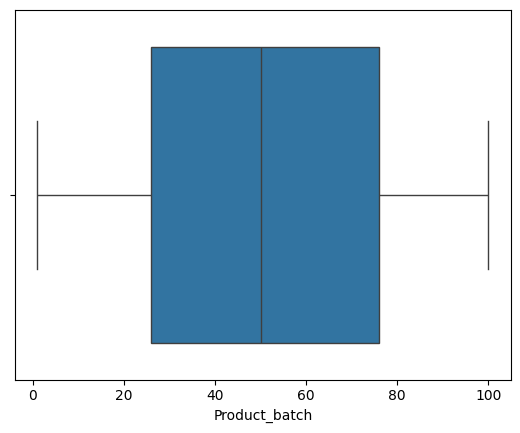

In [232]:
sns.boxplot(
    data = df,
    x='Product_batch'
            )

<Axes: xlabel='Product_costs'>

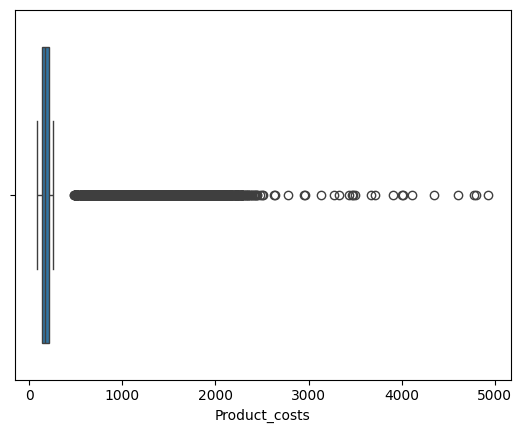

In [233]:
sns.boxplot(
    data = df,
    x='Product_costs'
            )

In [234]:
df_q_09 = df.loc[df['Product_costs']<=df['Product_costs'].quantile(0.90),:]
df_q_09['Product_costs'].describe()

count    270003.000000
mean        167.282958
std          39.580050
min          90.000000
25%         133.310000
50%         167.450000
75%         201.410000
max         235.620000
Name: Product_costs, dtype: float64

In [235]:
df_outliers = df.loc[df['Product_costs']>=235.62,:]
df_outliers

,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
1,P0002,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,621.0,1195.0,RAL7024,Steel (ST),Left,Wooden box,4.0,244.810000
36,P0037,Door_Security_Bulletproof_RAL7035_Plastic (PL)...,Door,Security,Bulletproof,693.0,1496.0,RAL7035,Plastic (PL),Left,Cardbox,2.0,249.370000
41,P0042,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,635.0,956.0,RAL7024,Steel (ST),Right,Cardbox,2.0,256.840000
43,P0044,Door_Industrial_Soundproof_RAL7024_Steel (ST)_...,Door,Industrial,Soundproof,674.0,265.0,RAL7024,Steel (ST),Left,Cardbox,13.0,239.160000
59,P0060,Frame_Design_Minimalist_RAL9005_Plastic (PL)_R...,Frame,Design,Minimalist,740.0,1192.0,RAL9005,Plastic (PL),Right,Wooden box,1.0,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299948,P299949,Door_Security_Reinforced_RAL7035_Aluminum (AL)...,Door,Security,Reinforced,699.0,653.0,RAL7035,Aluminum (AL),Left,Cardbox,1.0,500.000000
299953,P299954,Frame_Commercial_Warehouse_RAL7024_Plastic (PL...,Frame,Commercial,Warehouse,654.0,188.0,RAL7024,Plastic (PL),Left,Cardbox,2.0,240.900000
299955,P299956,Frame_Design_Minimalist_RAL9005_Steel (ST)_Rig...,Frame,Design,Minimalist,702.0,826.0,RAL9005,Steel (ST),Right,Wooden box,3.0,236.200000
299970,P299971,Frame_Industrial_Fire-rated_RAL7024_Plastic (P...,Frame,Industrial,Fire-rated,621.0,1311.0,RAL7024,Plastic (PL),Right,Wooden box,63.0,1033.099206


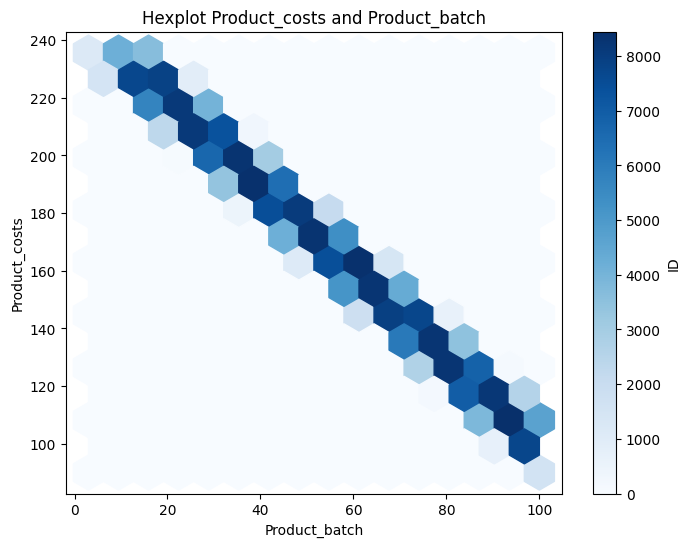

In [236]:

plt.figure(figsize=(8, 6))


plt.hexbin(df_q_09['Product_batch'], df_q_09['Product_costs'], gridsize=15, cmap='Blues')


plt.colorbar(label='ID')

# Přidání názvů os
plt.title('Hexplot Product_costs and Product_batch')
plt.xlabel('Product_batch')
plt.ylabel('Product_costs')

# Zobrazení grafu
plt.show()

In [237]:
df = df_q_09

# 4. Preprocessing

In [238]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Product_ID,270003,0,object,270003
1,Product_desc,270003,0,object,269857
2,Product_type,270003,0,category,2
3,Product_category,270003,0,category,5
4,Product_subcategory,270003,0,category,15
5,Width,270003,0,float64,137
6,Height,270003,0,float64,1771
7,Product_color,270003,0,category,3
8,Product_handle,270003,0,category,3
9,Product_hinge,270003,0,category,2


In [239]:
df['Product_color'].unique()

['RAL7024', 'RAL9005', 'RAL7035']
Categories (3, object): ['RAL7024', 'RAL7035', 'RAL9005']

In [240]:
cols_one_hot_encode = list(df.select_dtypes('category').columns)
cols_one_hot_encode

['Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

In [241]:
df = pd.get_dummies(df, columns=cols_one_hot_encode, dtype=int)

In [242]:
df = df.drop(columns=['Product_ID','Product_desc'])

In [243]:
df

,Width,Height,Product_batch,Product_costs,Product_type_Door,Product_type_Frame,Product_category_Commercial,Product_category_Design,Product_category_Industrial,Product_category_Residential,...,Product_color_RAL7024,Product_color_RAL7035,Product_color_RAL9005,Product_handle_Aluminum (AL),Product_handle_Plastic (PL),Product_handle_Steel (ST),Product_hinge_Left,Product_hinge_Right,Product_packing_Cardbox,Product_packing_Wooden box
0,638.0,336.0,56.0,173.67,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
2,699.0,1143.0,84.0,121.27,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,1,0
3,614.0,1493.0,22.0,216.81,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
4,750.0,1275.0,99.0,108.44,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
5,620.0,523.0,36.0,194.53,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,747.0,1177.0,50.0,171.20,0,1,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
299996,717.0,1515.0,76.0,128.36,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
299997,619.0,1114.0,32.0,207.19,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
299998,648.0,1149.0,37.0,188.61,0,1,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [244]:
df.columns

Index(['Width', 'Height', 'Product_batch', 'Product_costs',
       'Product_type_Door', 'Product_type_Frame',
       'Product_category_Commercial', 'Product_category_Design',
       'Product_category_Industrial', 'Product_category_Residential',
       'Product_category_Security', 'Product_subcategory_Access-controlled',
       'Product_subcategory_Balcony', 'Product_subcategory_Bulletproof',
       'Product_subcategory_Classic', 'Product_subcategory_Exterior',
       'Product_subcategory_Fire-rated', 'Product_subcategory_Glass-panel',
       'Product_subcategory_Interior', 'Product_subcategory_Minimalist',
       'Product_subcategory_Office', 'Product_subcategory_Reinforced',
       'Product_subcategory_Retail', 'Product_subcategory_Soundproof',
       'Product_subcategory_Thermal-insulated',
       'Product_subcategory_Warehouse', 'Product_color_RAL7024',
       'Product_color_RAL7035', 'Product_color_RAL9005',
       'Product_handle_Aluminum (AL)', 'Product_handle_Plastic (PL)',
    

# 5. TrainTest Split

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X = df.drop(columns=['Product_costs'])
y = df['Product_costs']

In [247]:
X.columns

Index(['Width', 'Height', 'Product_batch', 'Product_type_Door',
       'Product_type_Frame', 'Product_category_Commercial',
       'Product_category_Design', 'Product_category_Industrial',
       'Product_category_Residential', 'Product_category_Security',
       'Product_subcategory_Access-controlled', 'Product_subcategory_Balcony',
       'Product_subcategory_Bulletproof', 'Product_subcategory_Classic',
       'Product_subcategory_Exterior', 'Product_subcategory_Fire-rated',
       'Product_subcategory_Glass-panel', 'Product_subcategory_Interior',
       'Product_subcategory_Minimalist', 'Product_subcategory_Office',
       'Product_subcategory_Reinforced', 'Product_subcategory_Retail',
       'Product_subcategory_Soundproof',
       'Product_subcategory_Thermal-insulated',
       'Product_subcategory_Warehouse', 'Product_color_RAL7024',
       'Product_color_RAL7035', 'Product_color_RAL9005',
       'Product_handle_Aluminum (AL)', 'Product_handle_Plastic (PL)',
       'Product_handl

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [249]:
from scipy.stats import zscore

In [250]:
z_scores = zscore(y_train)

In [251]:
mask = np.abs(z_scores) < 3


In [252]:
X_train = X_train[mask]
y_train = y_train[mask]

# 6. Standardization

In [253]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_standardized = pd.DataFrame(scaler.fit_transform(X_train))
X_val_standardized = pd.DataFrame(scaler.transform(X_val))
X_test_standardized = pd.DataFrame(scaler.transform(X_test))
X_train_standardized.columns = X_train.columns
X_val_standardized.columns = X_val.columns
X_test_standardized.columns = X_test.columns

# 7. Models

In [254]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

## 7.1 Linear Regresion

### 7.1.1 Default linear model

In [255]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train_standardized, y_train)

LinearRegression(n_jobs=-1)

In [256]:
linear_model_prediction = linear_model.predict(X_val_standardized)

In [257]:
linear_model_mea = mean_absolute_error(y_val, linear_model_prediction)
linear_model_rmse = root_mean_squared_error(y_val,linear_model_prediction)
print(f"Linear Regression - Mean Absolute Error: {linear_model_mea:.2f}")
print(f"Linear Regression - Root Mean Squared Error: {linear_model_rmse:.2f}")

Linear Regression - Mean Absolute Error: 4.98
Linear Regression - Root Mean Squared Error: 5.76


In [258]:
y_val.describe()

count    43201.000000
mean       167.278757
std         39.536827
min         90.000000
25%        133.190000
50%        167.310000
75%        201.280000
max        235.620000
Name: Product_costs, dtype: float64

### 7.1.2 Optuna linear model

In [259]:
import optuna

In [260]:
def objective(trial):
    parameters_linear = {
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "copy_X": trial.suggest_categorical("copy_X", [True, False])
    }
    model = LinearRegression(**parameters_linear, n_jobs=-1)

    model.fit(X_train_standardized,y_train)
    predictons = model.predict(X_val_standardized)

    return root_mean_squared_error(y_val, predictons)


In [261]:
study_linear = optuna.create_study(direction='minimize')
study_linear.optimize(objective,n_trials=50,n_jobs=-1)

[I 2025-06-07 19:50:40,718] A new study created in memory with name: no-name-736896b2-e0c8-45d3-a603-5272fc97973f
[I 2025-06-07 19:50:41,834] Trial 5 finished with value: 167.36920098702674 and parameters: {'fit_intercept': False, 'copy_X': False}. Best is trial 5 with value: 167.36920098702674.
[I 2025-06-07 19:50:41,859] Trial 2 finished with value: 5.758486265690791 and parameters: {'fit_intercept': True, 'copy_X': False}. Best is trial 2 with value: 5.758486265690791.
[I 2025-06-07 19:50:42,245] Trial 1 finished with value: 5.7584862656907925 and parameters: {'fit_intercept': True, 'copy_X': True}. Best is trial 2 with value: 5.758486265690791.
[I 2025-06-07 19:50:42,432] Trial 3 finished with value: 5.758486265690791 and parameters: {'fit_intercept': True, 'copy_X': False}. Best is trial 2 with value: 5.758486265690791.
[I 2025-06-07 19:50:42,433] Trial 0 finished with value: 5.7584862656907925 and parameters: {'fit_intercept': True, 'copy_X': True}. Best is trial 2 with value: 5.

In [262]:
optuna_linear_best_params  = study_linear.best_params
optuna_linear_best_value = study_linear.best_value
optuna_linear_best_params, optuna_linear_best_value

({'fit_intercept': True, 'copy_X': False}, 5.758486265690791)

In [263]:
study_linear_data = study_linear.trials_dataframe()

## 7.2 Random Forest

In [264]:
from sklearn.ensemble import RandomForestRegressor

### 7.2.1 Default Random forest regressor

In [265]:
random_model = RandomForestRegressor(n_jobs=-1, random_state=42)
random_model.fit(X_train, y_train)
random_model_prediction = random_model.predict(X_val)


random_model_mea = mean_absolute_error(y_val, random_model_prediction)
random_model_rmse = root_mean_squared_error(y_val,random_model_prediction)
print(f"Random_model - Mean Absolute Error: {random_model_mea:.2f}")
print(f"Random_model- Root Mean Squared Error: {random_model_rmse:.2f}")

Random_model - Mean Absolute Error: 5.02
Random_model- Root Mean Squared Error: 5.90


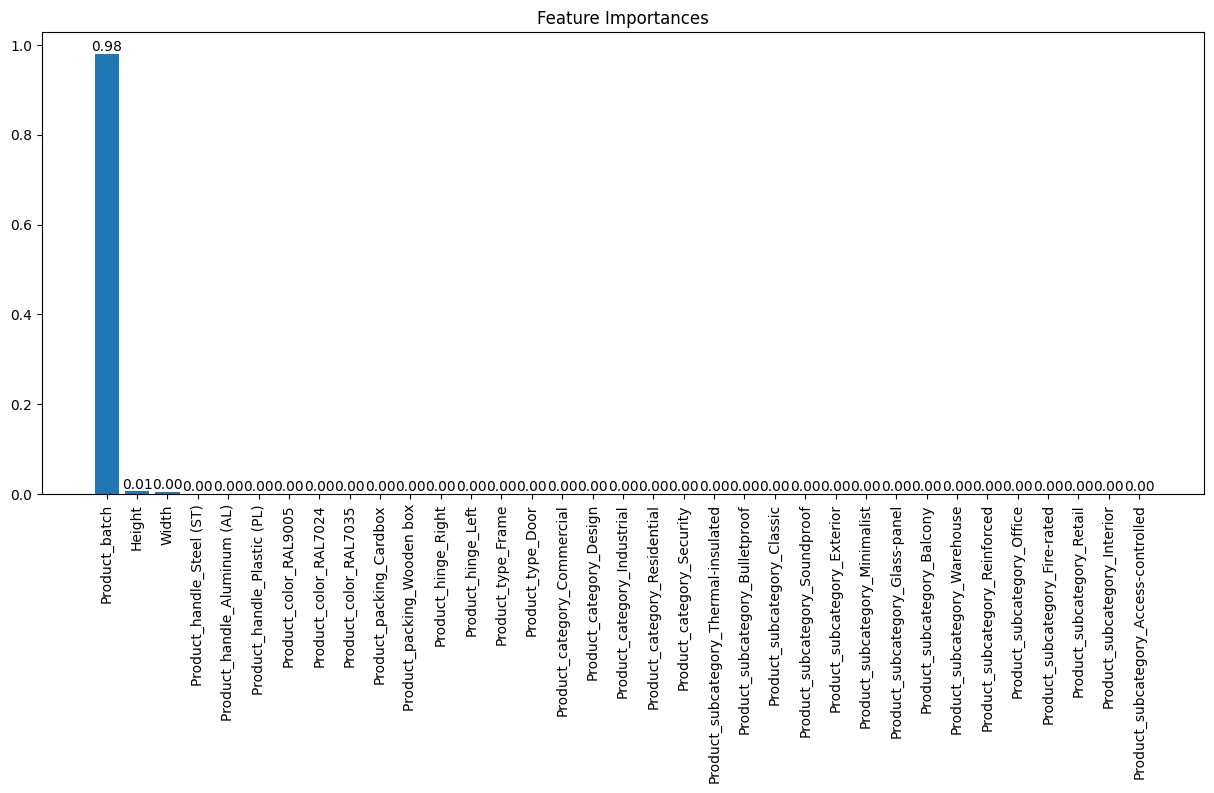

In [266]:
importances = random_model.feature_importances_
df_importances = pd.DataFrame(
    {'Feature': X_test.columns,
     'Importances': importances}
)
df_importances = df_importances.sort_values( by = 'Importances', ascending= False)

plt.figure(figsize=(15,6))
plt.bar(df_importances['Feature'], df_importances['Importances'])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.show()

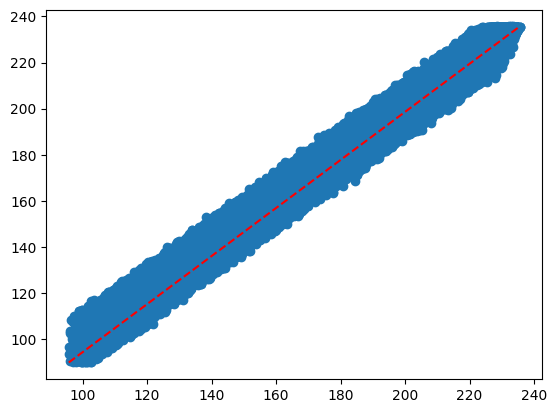

In [267]:
plt.scatter(random_model_prediction, y_val)
plt.plot(np.linspace(random_model_prediction.min(), random_model_prediction.max()),np.linspace(y_val.min(), y_val.max()), color='red', linestyle='--')

### 7.2.2 Optuna Random Forest

In [268]:
def objective(trial):
    parameters_random = {
    "n_estimators": trial.suggest_int("n_estimators", 100, 501, step=50),
    "max_depth": trial.suggest_int("max_depth", 3, 20),
    "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
    "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
    "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
    "bootstrap": trial.suggest_categorical("bootstrap", [True, False])
    }
    model = RandomForestRegressor(**parameters_random, n_jobs=-1, random_state=42)

    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    return root_mean_squared_error(y_val, predictions)

In [269]:
#study_random = optuna.create_study(direction = 'minimize')
#study_random.optimize(objective, n_trials=50, n_jobs=-1)

In [270]:
#optuna_random_best_params  = study_random.best_params
#optuna_random_best_value = study_random.best_value
#optuna_random_best_params, optuna_random_best_value

In [271]:
optuna_random_best_params = {'n_estimators': 350,
  'max_depth': 7,
  'min_samples_split': 13,
  'min_samples_leaf': 10,
  'max_features': None,
  'bootstrap': True}

# saved parameters for RandomForestRegressor, because of computational time

## 7.3 LightGMB

In [272]:
from lightgbm import LGBMRegressor

### 7.3.1 LightGMB Default

In [273]:
ligh_model = LGBMRegressor(n_jobs=-1, random_state=42)
ligh_model.fit(X_train, y_train)
ligh_model_prediction = ligh_model.predict(X_val)


ligh_model_mea = mean_absolute_error(y_val, ligh_model_prediction)
ligh_model_rmse = root_mean_squared_error(y_val,ligh_model_prediction)
print(f"ligh_model - Mean Absolute Error: {ligh_model_mea:.2f}")
print(f"ligh_model- Root Mean Squared Error: {ligh_model_rmse:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 172801, number of used features: 35
[LightGBM] [Info] Start training from score 167.314326
ligh_model - Mean Absolute Error: 4.89
ligh_model- Root Mean Squared Error: 5.68


### 7.3.2 LightGBM Optuna

In [274]:
def objective(trial):

    gbm_parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 401),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 5, 181),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
    }

    model_gbm = LGBMRegressor(**gbm_parameters, random_state=42, n_jobs=-1)

    model_gbm.fit(X_train, y_train)
    predictions = model_gbm.predict(X_val)

    return root_mean_squared_error(y_val, predictions)

In [275]:
study_gbm= optuna.create_study(direction = 'minimize')
study_gbm.optimize(objective, n_trials=50, n_jobs=-1)

[I 2025-06-07 19:51:32,716] A new study created in memory with name: no-name-bdd2611a-151f-4e92-92e0-b17ec9d0339f
[I 2025-06-07 19:51:36,841] Trial 3 finished with value: 5.68506508326112 and parameters: {'n_estimators': 351, 'max_depth': 3, 'learning_rate': 0.12798723327866482, 'num_leaves': 50, 'subsample': 0.8980108879437902}. Best is trial 3 with value: 5.68506508326112.
[I 2025-06-07 19:51:36,990] Trial 4 finished with value: 5.6991366078140535 and parameters: {'n_estimators': 254, 'max_depth': 11, 'learning_rate': 0.2890972331092938, 'num_leaves': 12, 'subsample': 0.8689267757622683}. Best is trial 3 with value: 5.68506508326112.
[I 2025-06-07 19:51:38,847] Trial 0 finished with value: 5.696604022836157 and parameters: {'n_estimators': 74, 'max_depth': 13, 'learning_rate': 0.1990678745765071, 'num_leaves': 70, 'subsample': 0.8129700315532135}. Best is trial 3 with value: 5.68506508326112.
[I 2025-06-07 19:51:39,223] Trial 8 finished with value: 5.680990928820001 and parameters: {

In [276]:
gbm_best_params = study_gbm.best_params
gbm_best_value = study_gbm.best_value

gbm_best_params,gbm_best_value

({'n_estimators': 226,
  'max_depth': 10,
  'learning_rate': 0.05571654815331678,
  'num_leaves': 5,
  'subsample': 0.606026054461124},
 5.679093335226401)

In [277]:
optuna.visualization.plot_optimization_history(study_gbm)

In [278]:
optuna.visualization.plot_parallel_coordinate(study_gbm)

## 7.4 Models evaluations

In [279]:
X = pd.concat([X_train,X_val]) 
y = pd.concat([y_train,y_val])

In [280]:
linear_model = LinearRegression(**optuna_linear_best_params,n_jobs=-1)
random_model = RandomForestRegressor(**optuna_random_best_params,n_jobs=-1,random_state=42)
gbm_model = LGBMRegressor(**gbm_best_params,n_jobs=-1,random_state=42)

In [281]:
linear_model.fit(X,y)
random_model.fit(X,y)
gbm_model.fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 216002, number of used features: 35
[LightGBM] [Info] Start training from score 167.307212


LGBMRegressor(learning_rate=0.05571654815331678, max_depth=10, n_estimators=226,
              n_jobs=-1, num_leaves=5, random_state=42,
              subsample=0.606026054461124)

In [282]:
y_final_preds_linear = linear_model.predict(X_test)
y_final_preds_random = random_model.predict(X_test)
y_final_preds_gbm = gbm_model.predict(X_test)

In [283]:
rmse_linear = root_mean_squared_error(y_test,y_final_preds_linear)
rmse_random = root_mean_squared_error(y_test,y_final_preds_random)
rmse_gbm = root_mean_squared_error(y_test,y_final_preds_gbm)

In [284]:
print(f'Final linear RMSE: {rmse_linear: 2f}')
print(f'Final Random RMSE: {rmse_random: 2f}')
print(f'Final gbm RMSE: {rmse_gbm: 2f}')

Final linear RMSE:  5.740244
Final Random RMSE:  5.664198
Final gbm RMSE:  5.661953


# 8. Model and Pipeline

In [285]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [286]:
final_model = gbm_model
joblib.dump(final_model,'final_model_gbm.joblib')

['final_model_gbm.joblib']